<a href="https://colab.research.google.com/github/Ha-eunYu/Section_Project/blob/main/cp1/v0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 다운
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Cyp5F5gPJFsJOqyeuTfZ")
project = rf.workspace("mmu-bkusm").project("-emfmu")
dataset = project.version(3).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 267 kB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 145 kB 31.4 MB/s 
     |████████████████████████████████| 178 kB 47.6 MB/s 
     |████████████████████████████████| 138 kB 54.0 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6f643494fb7ada15bf54e17dd249e6e36bf5915274d2d7f9c9152808976b599a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ㅇ-3 in yolov5pytorch:: 100%|██████████| 4538/4538 [00:01<00:00, 2452.68it/s]


In [35]:
# opencv 설치
!pip install opencv-python
import numpy as np
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# ymal파일 확인
%cat /content/dataset/data.yaml

names:
- '0'
nc: 1
train: "\u3147-3/train/images"
val: "\u3147-3/valid/images"


In [4]:
# 파일경로 확인 및 데이터 갯수 확인
from glob import glob

train_img_list = glob('/content/dataset/train/images/*.jpg')
val_img_list = glob('/content/dataset/valid/images/*.jpg')
test_img_list = glob('/content/dataset/test/images/*.jpg')

print(len(train_img_list))
print(len(val_img_list))
print(len(test_img_list))

1840
317
106


In [5]:
# 파일경로 img_list.txt 저장
with open('/content/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

with open('/content/dataset/train.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

In [8]:
# ymal파일 수정
import yaml
with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
print(data)

data['names'] = ['License Plate']
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'
# data['test'] = '/content/dataset/test.txt'

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)
print(data)

{'names': ['0'], 'nc': 1, 'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt'}
{'names': ['License Plate'], 'nc': 1, 'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt'}


In [9]:
%cat /content/dataset/data.yaml
# train: 학습 데이터 폴더 경로(이미지)
# val: 검증 데이터 폴더 경로(이미지)
# nc: 학습할 클래스 갯수
# names: 학습할 클래스 이름

names:
- License Plate
nc: 1
train: /content/dataset/train.txt
val: /content/dataset/val.txt


In [10]:
# train img 읽고, blobRfomImage함수로 전처리
# [0,255] [0,1]로 정규회
# 448*448영상
# opencv BFR 순서를 RGR로 바꿈
img_path=train_img_list[0]
img=cv2.imread(img_path)
height, width,channels = img.shape
blob=cv2.dnn.blobFromImage(img, 1.0/256, (448,448), (0,0,0), swapRB=True, crop=False)

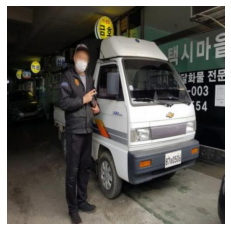

(1, 3, 448, 448)


In [33]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.show()

In [37]:
# YOLO v5를 github에서 받음
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14999, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 14999 (delta 213), reused 235 (delta 134), pack-reused 14669
Receiving objects: 100% (14999/14999), 13.71 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (10355/10355), done.


In [41]:
# 다운받은 가중치와 신경망 구조 정보
yolo_model=cv2.dnn.readNet('yolov5s.pt','/content/yolov5/models/yolov5s.yaml')

error: ignored

In [ ]:
# 신경망의 출력을 담당하는 3개의 층, yolo_82, yolo_94, yolo_106
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i[0]-1] for i in yolo_model.getUnconnectedOutLayers()]

In [ ]:
# 테스트 영상을 입력하고 출력을 받아 output3객체에 저장
yolo_model.setInput(blob)
output3=yolo_model.forward(out_layers)